In [55]:
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv('SolarPrediction_aligned.csv',usecols=[3],engine='python',nrows=5760)
dataset.head(5)


,Radiation
0,2.58
1,2.83
2,2.16
3,2.21
4,2.25


In [56]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

numpy.random.seed(7)

dataset=dataset.values
dataset=dataset.astype('float32')

scalar=MinMaxScaler(feature_range=(0,1))

dataset=scalar.fit_transform(dataset)




In [57]:
train_size=int(len(dataset)*0.67)
test_size=len(dataset)- train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]

print(train.shape)
print(train)
print(test.shape)
#print(test)

(3859, 1)
[[8.87444476e-04]
 [1.04368478e-03]
 [6.24960987e-04]
 [6.56209071e-04]
 [6.81207399e-04]
 [6.18711463e-04]
 [5.68714458e-04]
 [5.62464818e-04]
 [5.87463262e-04]
 [5.68714458e-04]
 [5.87463262e-04]
 [7.74951652e-04]
 [5.62464818e-04]
 [1.49365666e-03]
 [1.54365355e-03]
 [1.62489840e-03]
 [1.30616839e-03]
 [1.71239313e-03]
 [1.23117317e-03]
 [1.38116360e-03]
 [1.46865810e-03]
 [1.04993430e-03]
 [1.31241803e-03]
 [8.81194952e-04]
 [8.87444476e-04]
 [1.29991875e-03]
 [1.06868311e-03]
 [8.49946868e-04]
 [9.87438252e-04]
 [7.12455483e-04]
 [6.81207399e-04]
 [5.99962426e-04]
 [4.87469602e-04]
 [5.43716014e-04]
 [6.87457039e-04]
 [6.93706679e-04]
 [9.18692676e-04]
 [1.10618095e-03]
 [8.93694116e-04]
 [1.04368478e-03]
 [6.31210627e-04]
 [5.99962426e-04]
 [5.37466374e-04]
 [3.31229414e-04]
 [5.43716014e-04]
 [1.36866432e-03]
 [7.37453927e-04]
 [6.49959431e-04]
 [9.18692676e-04]
 [1.27492042e-03]
 [1.05618394e-03]
 [7.62452488e-04]
 [9.43691120e-04]
 [1.28741947e-03]
 [9.81188728e-04]


In [58]:
def create_dataset(dataset,look_back):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        #a=dataset第0行i~i+look_back個
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX),numpy.array(dataY)

    

In [59]:
#根據前面幾個資料來看下一步 彙整成look_back行的資料
look_back=5
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)
print(testX.shape)
print(testY.shape)
print(trainX.shape)
print(trainY.shape)


(1895, 5)
(1895,)
(3853, 5)
(3853,)


In [60]:
#轉為三維
trainX=numpy.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=numpy.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [61]:
model=Sequential()
#添加的一個 LSTM 層。
#這個層有一個名為 4 的參數，這表示該 LSTM 層有 4 個隱藏單元（hidden units）。
# input_shape=(look_back, 1) 則指定了輸入數據的形狀，
# 其中 look_back 是時間窗口的大小，1 表示每個時間步的特徵數。
model.add(LSTM(4,input_shape=(look_back,1)))
#Dense全連接後輸出一層
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

model.fit(trainX,trainY,epochs=5,batch_size=1,verbose=2)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4)                 96        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
3853/3853 - 11s - loss: 0.0075 - 11s/epoch - 3ms/step
Epoch 2/5
3853/3853 - 9s - loss: 0.0048 - 9s/epoch - 2ms/step
Epoch 3/5
3853/3853 - 9s - loss: 0.0046 - 9s/epoch - 2ms/step
Epoch 4/5
3853/3853 - 9s - loss: 0.0046 - 9s/epoch - 2ms/step
Epoch 5/5
3853/3853 - 9s - loss: 0.0045 - 9s/epoch - 2ms/step


In [62]:
trainPre=model.predict(trainX)
testPre=model.predict(testX)



trainPre=scalar.inverse_transform(trainPre)
trainY=scalar.inverse_transform([trainY])
testPre=scalar.inverse_transform(testPre)
testY=scalar.inverse_transform([testY])


60/60 [==============================] - 0s 2ms/step


In [63]:
print(trainY.shape)
print(trainPre.shape)
print(trainY[0,1])
print(trainPre[1,0])


(1, 3853)
(3853, 1)
2.0699999729899567
2.970634


In [64]:
trainScore=math.sqrt(mean_squared_error(trainY[0,:],trainPre[:,0]))
print('Train Score:%.2f RMSE'%(trainScore))
testScore=math.sqrt(mean_squared_error(testY[0,:],testPre[:,0]))
print('Train Score:%.2f RMSE'%(testScore))

Train Score:105.19 RMSE
Train Score:77.55 RMSE


In [65]:
trainPredictplot=numpy.empty_like(dataset)
#print(trainPredictplot)
trainPredictplot[:,:]=numpy.nan
#print(trainPredictplot)
trainPredictplot[look_back:len(trainPre)+look_back,:]=trainPre
#print(trainPredictplot)

In [66]:
testPredictPlot=numpy.empty_like(dataset)
testPredictPlot[:,:]=numpy.NaN
testPredictPlot[len(trainPre)+(look_back*2)+1:len(dataset)-1,:]=testPre
print(testPredictPlot)

[[         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [      

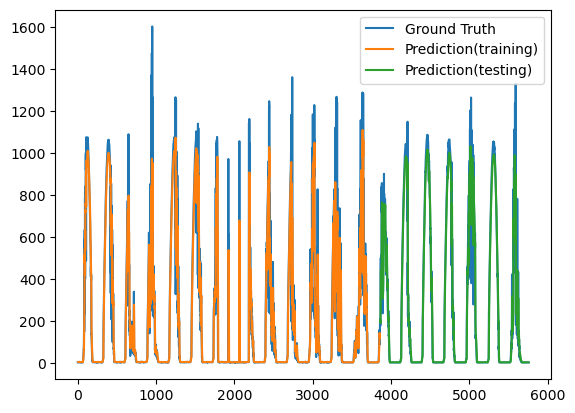

In [67]:
plt.plot(scalar.inverse_transform(dataset),label='Ground Truth')
plt.plot(trainPredictplot,label='Prediction(training)')
plt.plot(testPredictPlot,label='Prediction(testing)')
plt.legend()
plt.show()

In [68]:
import sys
numpy.set_printoptions(threshold=sys.maxsize)
detect=scalar.inverse_transform(dataset)
print(detect[400:500,:])

[[1043.28     ]
 [1037.8      ]
 [1029.84     ]
 [1031.59     ]
 [1024.83     ]
 [1018.05005  ]
 [1011.23     ]
 [ 999.86993  ]
 [ 993.4099   ]
 [ 988.77     ]
 [ 978.68     ]
 [ 966.7001   ]
 [ 955.95     ]
 [ 943.36     ]
 [ 931.96     ]
 [ 909.25     ]
 [ 895.7299   ]
 [ 879.58997  ]
 [ 873.71     ]
 [ 904.93994  ]
 [ 939.55     ]
 [ 331.24     ]
 [ 840.74005  ]
 [ 426.45     ]
 [ 913.07996  ]
 [ 262.72     ]
 [ 854.20996  ]
 [ 730.96     ]
 [ 727.93     ]
 [ 749.09     ]
 [ 206.12     ]
 [ 723.78     ]
 [ 723.83     ]
 [ 630.46     ]
 [ 595.72     ]
 [ 573.62     ]
 [ 554.73     ]
 [ 611.72     ]
 [ 146.46     ]
 [ 633.9      ]
 [ 151.68     ]
 [ 219.95     ]
 [ 441.23004  ]
 [ 207.70999  ]
 [ 560.97     ]
 [  97.99     ]
 [ 397.01     ]
 [ 326.75     ]
 [ 383.31     ]
 [ 366.48     ]
 [ 113.09999  ]
 [ 276.47     ]
 [ 273.94     ]
 [ 329.62     ]
 [ 161.93     ]
 [ 125.13     ]
 [ 111.68     ]
 [  81.22     ]
 [  64.89     ]
 [  63.669994 ]
 [  71.77     ]
 [  39.1      ]
 [  46.5